# Fairness, Accountability, Transparency and Ethics Course (FATE)

## Universitat Pompeu Fabra (UPF)
### Year 22/23
### Author: Manuel Portela (manuel.portela@upf.edu) 
*** Partially based on the original exercises made by David Solans (david.solans@upf.edu) ***
<br>
This part of the Lab 3 does not have any deliverable.

**Legend** <br>
In this notebook we use:    
<div class="alert alert-block col-md-7 alert-info">To recall information from the theory classes and other tips</div>
<div class="alert alert-block col-md-7 alert-warning">To point important things that should not be 
   forgotten</div> 
<div class="alert alert-block col-md-7 alert-primary bg-primary">LAB TASK</div>


# 3. Part 1: Algorithmic Fairness with Python and IBM AIF360

###  Libraries used in this notebook
You will need to install: **numpy**, **pandas**, **matplotlib**, and **sklearn**.

In [2]:
pip install aif360

     |████████████████████████████████| 214 kB 260 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
## Required statements
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from aif360.datasets import BinaryLabelDataset, StandardDataset
from aif360.datasets import AdultDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

from aif360.sklearn.datasets import standardize_dataset
from aif360.sklearn.metrics import disparate_impact_ratio, average_odds_error, base_rate, ratio, difference

from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions\
        import load_preproc_data_adult

from aif360.metrics import BinaryLabelDatasetMetric

from IPython.display import Markdown, display

from xgboost import XGBClassifier

from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[LawSchoolGPA]'


# Session 05

## 3.0 Introduction
<br>
<div class="alert alert-block alert-info col-md-12">
<p>In previous Lab we were using pandas to load the Adult dataset (See Lab2 notebook).<p>
<p>In pandas we would use the following statements to load a dataset:</p>

</div>






In [4]:
columns_names = (
    'age',
    'workclass', #Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'fnlwgt', # "weight" of that person in the dataset (i.e. how many people does that person represent) -> https://www.kansascityfed.org/research/datamuseum/cps/coreinfo/keyconcepts/weights
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
)
columns_types = {'age': str,
    'workclass': 'category', 
    'fnlwgt': int, 
    'education':'category',
    'education-num': int,
    'marital-status':'category',
    'occupation':'category',
    'relationship':'category',
    'race':'category',
    'sex':'category',
    'capital-gain':int,
    'capital-loss':int,
    'hours-per-week':int,
    'native-country':'category',
    'income':'category'
                }

df = pd.read_csv("../Data/adult.data", names=columns_names, dtype=columns_types)
df = df.dropna()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 3.1 AIF360

AIF360 is a Python library developed by IBM that aims to help ML practicioners to include Algorithmic Fairness considerations on their developments.

It's one of the most used libraries in the topic of Algorithmic Fairness and little by little is becoming an standard.

Documentation is available [here](https://aif360.readthedocs.io/en/latest/)

Video tutorial is available [here](https://www.youtube.com/watch?v=X1NsrcaRQTE)


AIF360 offers tools for **fairness metrics** and **bias mitigation algorithms**

## 3.2 Using AIF360

### 1. Installation

In [11]:
## Uncomment this line to install the last version of the library
#!pip install -U aif360

In AIF360, there is the class Dataset that can be used for similar purposes. AIF360 already has some pre-loaded datasets. 

In the following example, we will use again the Adult Census dataset.

### 2. Loading Common Datasets: 

#### Option A. Pre loaded in the tool


Last versions of the libary do not install the preloaded datasets directly but require a manual installation of them. 

You can see [here](https://aif360.readthedocs.io/en/latest/modules/datasets.html#common-datasets) what are the **Common Datasets** that you can directly download.

You can use the following script to automatize the downloading of the three main datasets:


In [12]:
## Uncomment this to automatize the downloading of AIF pre-loaded datasets (we will use a custom dataset)

## First: Check the PythonPath if its according to your python version and the actual path to be installed. 
#import os
#import sys
#print(os.path.dirname(sys.executable))

## Second: Edit the sh with the correct path and execute the following line:
#!sh download_aif360_datasets.sh

#### Option b. Set a custom dataset

Alternative, we will use the scikit-learn functions from AIF360 to load a custom dataset. See <a href="https://aif360.readthedocs.io/en/latest/modules/sklearn.html#module-aif360.sklearn.datasets">documentation</a>.

We will need to standarize the dataset in order to be used with AIF360 scikit-learn functions.

In [13]:
#Examples and other sources:
# https://github.com/Trusted-AI/AIF360/blob/master/examples/sklearn/monthly_bee_datasets_metrics.ipynb
# https://github.com/Trusted-AI/AIF360/blob/master/examples/sklearn/demo_new_features.ipynb    

columns_names = (
    'age',
    'workclass', #Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    #'fnlwgt', # "weight" of that person in the dataset (i.e. how many people does that person represent) -> https://www.kansascityfed.org/research/datamuseum/cps/coreinfo/keyconcepts/weights
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    #'income'
)

X, y, sample_weight = standardize_dataset(df, prot_attr=['race', 'sex'], target='income',sample_weight='fnlwgt', usecols=columns_names)
X

age          workclass    education  education-num  \
race   sex                                                          
 White  Male    39          State-gov    Bachelors             13   
        Male    50   Self-emp-not-inc    Bachelors             13   
        Male    38            Private      HS-grad              9   
 Black  Male    53            Private         11th              7   
        Female  28            Private    Bachelors             13   
...             ..                ...          ...            ...   
 White  Female  27            Private   Assoc-acdm             12   
        Male    40            Private      HS-grad              9   
        Female  58            Private      HS-grad              9   
        Male    22            Private      HS-grad              9   
        Female  52       Self-emp-inc      HS-grad              9   

                     marital-status          occupation    relationship  \
race   sex                                                                
 White  Male          Never-married        Adm-clerical   Not-in-family   
        Male     Married-civ-spouse     Exec-managerial         Husband   
        Male               Divorced   Handlers-cleaners   Not-in-family   
 Black  Male     Married-civ-spouse   Handlers-cleaners         Husband   
        Female   Married-civ-spouse      Prof-specialty            Wife   
...                             ...                 ...             ...   
 White  Female   Married-civ-spouse        Tech-support            Wife   
        Male     Married-civ-spouse   Machine-op-inspct         Husband   
        Female              Widowed        Adm-clerical       Unmarried   
        Male          Never-married        Adm-clerical       Own-child   
        Female   Married-civ-spouse     Exec-managerial            Wife   

                  race      sex  capital-gain  capital-loss  hours-per-week  \
race   sex                                                                    
 White  Male     White     Male          2174             0              40   
        Male     White     Male             0             0              13   
        Male     White     Male             0             0              40   
 Black  Male     Black     Male             0             0              40   
        Female   Black   Female             0             0              40   
...                ...      ...           ...           ...             ...   
 White  Female   White   Female             0             0              38   
        Male     White     Male             0             0              40   
        Female   White   Female             0             0              40   
        Male     White     Male             0             0              20   
        Female   White   Female         15024             0              40   

                native-country  
race   sex                      
 White  Male     United-States  
        Male     United-States  
        Male     United-States  
 Black  Male     United-States  
        Female            Cuba  
...                        ...  
 White  Female   United-States  
        Male     United-States  
        Female   United-States  
        Male     United-States  
        Female   United-States  

[32560 rows x 13 columns]

In [14]:
#We can then map the protected attributes to integers,
X.index = pd.MultiIndex.from_arrays(X.index.codes, names=X.index.names)
y.index = pd.MultiIndex.from_arrays(y.index.codes, names=y.index.names)

#and the target classes to 0/1
y = pd.Series(y.factorize(sort=True)[0], index=y.index)

In [15]:
#Then we need to split the dataset
(X_train, X_test,
 y_train, y_test) = train_test_split(X, y, train_size=0.7, random_state=1234567)

#Onehotencoding the features
ohe = make_column_transformer(
        (OneHotEncoder(sparse=False), X_train.dtypes == 'category'),
        remainder='passthrough', verbose_feature_names_out=False)
X_train  = pd.DataFrame(ohe.fit_transform(X_train), columns=ohe.get_feature_names_out(), index=X_train.index)
X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out(), index=X_test.index)

X_train.head()

/Users/aitanagonzalezcardenas/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
race sex                                                            
4    0            0.0                    0.0                  0.0   
     0            0.0                    0.0                  0.0   
     1            0.0                    0.0                  0.0   
     0            0.0                    0.0                  0.0   
     0            0.0                    0.0                  0.0   

         workclass_ Never-worked workclass_ Private workclass_ Self-emp-inc  \
race sex                                                                      
4    0                       0.0                1.0                     0.0   
     0                       0.0                1.0                     0.0   
     1                       0.0                1.0                     0.0   
     0                       0.0                1.0                     0.0   
     0                       0.0                1.0                     0.0   

         workclass_ Self-emp-not-inc workclass_ State-gov  \
race sex                                                    
4    0                           0.0                  0.0   
     0                           0.0                  0.0   
     1                           0.0                  0.0   
     0                           0.0                  0.0   
     0                           0.0                  0.0   

         workclass_ Without-pay education_ 10th  ... native-country_ Thailand  \
race sex                                         ...                            
4    0                      0.0             0.0  ...                      0.0   
     0                      0.0             0.0  ...                      0.0   
     1                      0.0             0.0  ...                      0.0   
     0                      0.0             0.0  ...                      0.0   
     0                      0.0             0.0  ...                      0.0   

         native-country_ Trinadad&Tobago native-country_ United-States  \
race sex                                                                 
4    0                               0.0                           1.0   
     0                               0.0                           1.0   
     1                               0.0                           0.0   
     0                               0.0                           1.0   
     0                               0.0                           1.0   

         native-country_ Vietnam native-country_ Yugoslavia age education-num  \
race sex                                                                        
4    0                       0.0                        0.0  64             7   
     0                       0.0                        0.0  22            10   
     1                       0.0                        0.0  42            13   
     0                       0.0                        0.0  18             8   
     0                       0.0                        0.0  40             9   

         capital-gain capital-loss hours-per-week  
race sex                                           
4    0              0            0             16  
     0              0            0             40  
     1              0            0             45  
     0              0            0             30  
     0              0            0             38  

[5 rows x 106 columns]

In [16]:
#we can analyse the disparate impact on the original dataset for sex
disparate_impact_ratio(y_train, prot_attr='sex')

0.3635311214505411

In [17]:
# With the data in this format, we can easily train a scikit-learn model and get predictions for the test data:

y_pred = LogisticRegression(solver='liblinear').fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.8472563472563472

In [18]:
#we can analyse the accuracy difference on the original dataset for each group
difference(accuracy_score, y_test, y_pred, prot_attr='sex')

0.10931549143991781

In [19]:
# Now, we can analyze our predictions and quickly calucate the disparate impact for females vs. males:

disparate_impact_ratio(y_test, y_pred, prot_attr='sex')

0.28638213103054927

In [21]:
# And similarly, we can assess how close the predictions are to equality of odds.
average_odds_error(y_test, y_pred, prot_attr='sex')

0.10375466247790618

In [22]:
'''
In that case, we chose to look at the intersection of all protected attributes (race and sex) and designate a single combination (white males) as privileged.

If we wish to do something more complex, we can pass a custom array of protected attributes, like so (note: this choice of protected groups is just for demonstration):
'''

di_test = disparate_impact_ratio(y_test, y_pred, prot_attr='race')
di_test

0.7987925654592322

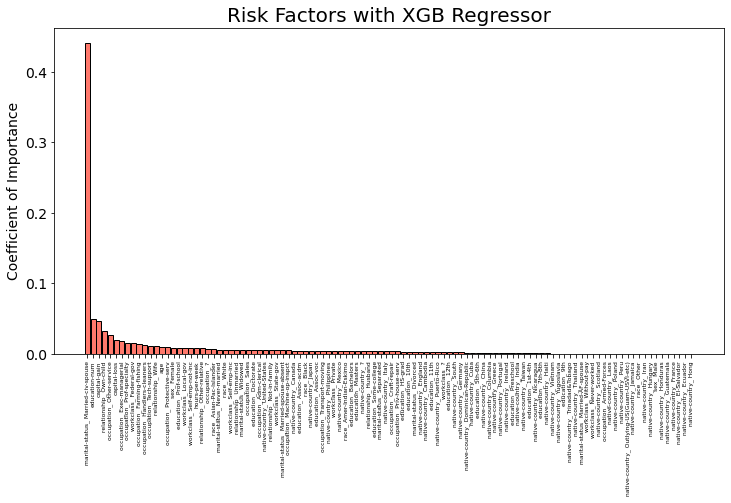

In [23]:
#preparing the data by changing the dtype of columns
s = X_train.select_dtypes(include='object').columns
X_train[s] = X_train[s].astype("float")

#training an XGBoost classifier
barWidth = 0.9
model = XGBClassifier(objective="binary:logistic")
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

#plot
plt.figure(4, figsize=(12, 6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#FF796C', width=barWidth,
        edgecolor='black')
plt.title('Risk Factors with XGB Regressor', size=20)
plt.xticks(rotation='vertical', fontsize=6)
plt.yticks(fontsize=14)
plt.ylabel('Coefficient of Importance', fontsize=14)
plt.show()

<div class="alert alert-block alert-primary bg-primary head-2">
    <h2 class="alert-heading">Lab 3 in-class exercise 1: train a different classifier</h2>
    <hr>
     <p class="mb-0">Use the data above to train three different scikit-learn classifiers of your election and store them in an array.</p>
</div>

In [27]:
## Your code here
#clfs = []

### 7. Predicting classification for the test set

<div class="alert alert-block alert-primary bg-primary head-2">
    <h2 class="alert-heading">Lab 3 in-class exercise 2: Obtaining predictions </h2>
    <hr>
     <p class="mb-0">Get the predictions for our X_test for each of the classifiers. Store the resulting result on an array.</p>
</div>

In [16]:
## Your code_here
#clfs_preds = []

dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)
X_test = scale_orig.transform(dataset_orig_test_pred.features)
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)


### 8. Assessing classification fairness for the predictions

In this cell, we will assess different [classification fairness metrics](https://aif360.readthedocs.io/en/latest/modules/generated/aif360.metrics.ClassificationMetric.html#aif360.metrics.ClassificationMetric)

In this analysis, we will use:
- **Balanced accuracy.** 
Accuracy balanced across privileged and unprivileged individuals.
$$0.5 * ACC_{D=unprivileged} + 0.5*ACC_{D=privileged} $$


- **Average odds difference.** 
Average of difference in FPR and TPR for unprivileged and privileged groups:
$$\frac{1}{2}[(FPR_{D=unprivileged} - FPR_{D=privileged}) + (TPR_{D=unprivileged}-TPR_{D=unprivileged})]$$

- **Disparate impact.** 
Ratio of probabilities of favorable label predicted for each group:
$$\frac{P(\hat Y = 1 | D=unprivileged)}{P(\hat Y = 1 | D=privileged)}$$

- **Error rate ratio.** Ratio of error rate for across groups:
$$\frac{ERR_{D=unprivileged}}{ERR_{D=privileged}}$$

<div class="alert alert-block alert-primary bg-primary head-2">
    <h2 class="alert-heading">Lab 3 in-class exercise 3: Assess classification fairness </h2>
    <hr>
     <p class="mb-0">Using the prediction results seen above, obtain the values for each of the fairness metrics mentioned above and store them in an array.</p>
    <p>See fairness metrics for scikit-learn <a href="https://aif360.readthedocs.io/en/latest/modules/sklearn.html#module-aif360.sklearn.metrics">here</a>.</p>
</div>

In [24]:
## Your code here

### 9. Plotting and interpretation of the obtained results

<div class="alert alert-block alert-primary bg-primary head-2">
    <h2 class="alert-heading">Lab 3 in-class exercise 4: Plot results </h2>
    <hr>
     <p class="mb-0">Plot the obtained values for the classification metrics for each of the trained classifiers.</p>
</div>

In [26]:
## Your code here

<div class="alert alert-block alert-primary bg-primary head-2">
    <h2 class="alert-heading">Lab 3 in-class exercise 5: Interpret the results </h2>
    <hr>
     <p class="mb-0">Provide an interpretation of the observed results (max 5 lines)</p>
    <p>Focusing in the two metrics for which you observe bigger and smaller differences is enough.</p>

</div>


**Your answer here**: